<a href="https://colab.research.google.com/github/bkrant/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def mvs(array):
  n = len(array)
  mean = sum(array)/n
  variance = sum( [(x-mean)**2 for x in array] ) / (n-1)
  sd = variance**0.5
  return mean, variance, sd

In [0]:
mvs(sales)

(3052.714285714286, 214387.90476190473, 463.0204150595357)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [0]:
import numpy as np
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
sd_C = mvs(customers)[2]
sd_S = mvs(sales)[2]
print(np.corrcoef(sales, customers) , '\n')
np.cov(sales, customers)/(sd_C*sd_S)

[[1.         0.96283398]
 [0.96283398 1.        ]] 



array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df = df.drop(columns=['Unnamed: 0'])
df['sex'] = df['sex'].replace({'male':0, 'female':1})
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.cov()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-0.050011,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,0.123090,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
sex,-0.050011,0.123090,0.229438,-0.354202,0.054690,0.088362,4.600321,0.387672,0.027508
age,-3.954605,-0.314343,-0.354202,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,0.054690,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,0.088362,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,4.600321,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,0.387672,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,0.027508,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
df.corr()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.124617,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,0.528693,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
sex,-0.124617,0.528693,1.000000,-0.057398,0.109609,0.213125,0.185523,0.015903,0.137396
age,-0.366370,-0.050199,-0.057398,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,0.109609,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,0.213125,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.185523,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.015903,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.137396,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Perpendicular is a synonym for orthogonal

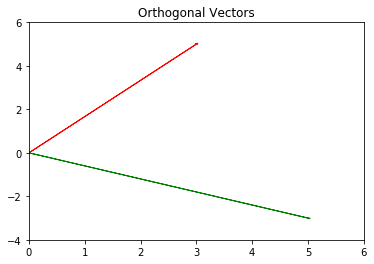

In [0]:
import matplotlib.pyplot as plt
vector_1=[3,5]
vector_2=[5,-3]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(0,6)          
plt.ylim(-4,6)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a=[-5,3,7]
b=[6,-8,2]
np.dot(a,b) # a and b are not orthogonal because dot product is not equal to zero

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c=np.array([2,-15,6,20])
print('Norm squared:',np.linalg.norm(c)**2,'\n')
print('Dot product:', np.dot(c,c),'\n')
print('Transpose matrix multiplied by original:', np.matmul(c.T,c),'\n' )
print('These expressions are different ways of saying the same thing')

Norm squared: 665.0 

Dot product: 665 

Transpose matrix multiplied by original: 665 

These expressions are different ways of saying the same thing


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}


\begin{align}
e = \begin{bmatrix} 2 \\ 11\\ 18 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f=np.array([4,12,11,9,2])
f/np.dot(f,f)

array([0.01092896, 0.03278689, 0.03005464, 0.02459016, 0.00546448])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

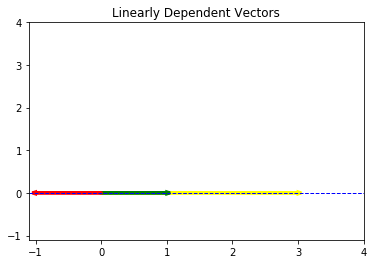

In [0]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

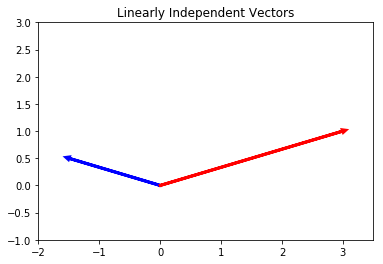

In [0]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
mat1=np.array([[1,2],
          [4,8]])
print('The determinant is', np.linalg.det(mat1),'therefore vectors g and h are linearly dependent and only span 1-D space')

The determinant is 0.0 therefore vectors g and h are linearly dependent and only span 1-D space


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
mat2=np.array([[1,2,3],
              [-1,0,7],
               [4,8,2]])
print('The determinant is', np.linalg.det(mat2),'not equal to zero, therefore l,m,n are linearly independent and span the entire 3-D space')

The determinant is -19.999999999999996 not equal to zero, therefore l,m,n are linearly independent and span the entire 3-D space


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



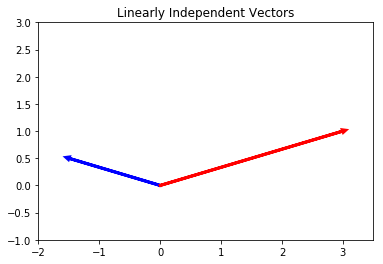

In [0]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

The basis of a vector space  V  is a set of vectors that are linearly independent and that span the vector space  V .

A set of vectors spans a space if their linear combinations fill the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p=np.array([[1,2,3],
            [-1,0,7],
            [4,8,2]])
print('Rank is',np.linalg.matrix_rank(p),'\n')
from sympy import *
M=Matrix([  [1,2,3],
           [-1,0,7],
            [4,8,2]])
print('Reduced row echelon form is \n')
M.rref()[0]

Rank is 3 

Reduced row echelon form is 



Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
v=[1,3]
w=[-1,2]
print((np.dot(w,v)/np.dot(v,v)))

0.5


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


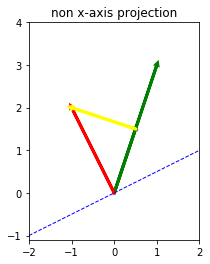

In [21]:
proj = np.multiply(0.5,v)
x_minus_proj = w-proj
# Set axes
plt.xlim(-2,2)          
plt.ylim(-1.1,4)

axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("non x-axis projection")
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

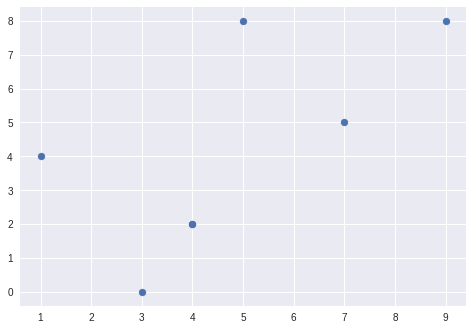

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()